# Lista 2 - Aprendizagem Automática

**Davi Braga Gomes - 0396905**

## 1) Regressão Logística

- Carregue os dados contidos no arquivo _ex1data1.txt_. O arquivo contem 97 linhas e 2 colunas de dados. Cada coluna se refere a uma variável. Neste problema, deve-se desenvolver um modelo onde a variável da coluna 2 será estimada a partir da variável da coluna 1.

    - **Apresentar:** Figura com os dados.
    - **Comentários**: Um modelo de regressão linear parece ser adequado para os dados em questão? Comente.
    


- Implemente o algoritmo do gradiente descendente estocástico para encontrar os coeficientes da regressão. Para este algoritmo utilize **α = 0.001** e utilize **1000 épocas** de treinamento. Para cada época de treinamento, calcule o erro quadrático médio (EQM) . Plote o gráfico “épocas x EQM”.

    - **Apresentar**: Valor final dos coeficientes e gráfico épocas x EQM.
    - **Comentários**: Através do gráfico “épocas x EQM” é possível verificar que o algoritmo está “aprendendo” ? Comente.



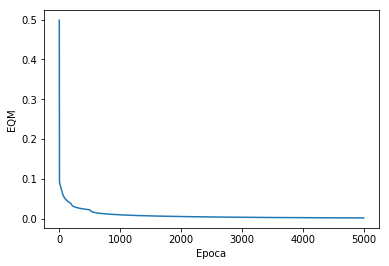

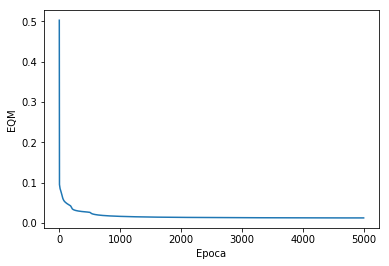

0.00235454260119
0.0126611385084
[[  2.38662666e-05   7.39737239e-05   2.53535547e-04   9.97663127e-01
    1.36834473e-04   1.21939847e-03   2.43756396e-07   5.76381269e-07
    7.28226762e-02   9.13560921e-06]
 [  1.00344169e-07   9.62085733e-01   2.86113571e-03   4.56020603e-04
    2.77257213e-06   1.49033824e-03   2.37534180e-03   3.48866987e-04
    3.62502027e-02   1.24302540e-03]
 [  1.68693912e-04   9.85151037e-05   1.01019506e-01   1.03663764e-05
    4.09705874e-06   2.63469347e-04   4.40747410e-05   2.40872910e-04
    9.18938661e-01   4.36139411e-02]]
[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]]


In [344]:
import scipy.io as sio
import numpy as np


def load_data():
    mat_contents = sio.loadmat('ex3data1.mat')
    X = mat_contents['X']
    T = mat_contents['T']
    return (X, T)

X, Y = load_data()

XY = np.concatenate((X,Y),1)
np.random.shuffle(XY)

X = XY[:,:400]
Y = XY[:,400:]


traning_x = X[:4000,:]
traning_y = Y[:4000,:]
validation_x = X[4000:4500,:]
validation_y = Y[4000:4500,:]
test_x = X[4500:5000,:]
test_y = Y[4500:5000,:]


class MLP(object):
    __n_input = 0
    __n_hidden = 0
    __n_output = 0
    __l0 = None
    __l1 = None
    
    def __init__(self, n_input, n_hidden, n_output):
        self.__n_input = n_input
        self.__n_hidden = n_hidden
        self.__n_output = n_output
        self.__l0 = 2*np.random.random((n_input, n_hidden)) -1
        self.__l1 = 2*np.random.random((n_hidden, n_output)) -1
        
    def set_l0(l0):
        self.__l0 = np.copy(l0)
    
    def set_l1(l1):
        self.__l1 = np.copy(l1)
    
    
    def sigmoid(self, z):
        return 1/(1 + np.exp(-(z)))
    
    def d_sigmoid(self, x):
        return x*(1-x)
    
    def fire(self, x):
        input_out = self.sigmoid(x.dot(self.__l0))
        return self.sigmoid(input_out.dot(self.__l1))
    
    def fit(self, x, y, alpha=0.005, n_epochs=500):
        
        errors = []
        
        for j in xrange(n_epochs):
            
            k1 = self.sigmoid(x.dot(self.__l0))
            k2 = self.sigmoid(k1.dot(self.__l1))
            
            
            k2_error = y - k2
            
            k2_delta = k2_error*self.d_sigmoid(k2)

            k1_error = k2_delta.dot(self.__l1.T)
    
            k1_delta= k1_error*self.d_sigmoid(k1)
        
            self.__l1 += k1.T.dot(k2_delta)*alpha
            self.__l0 += x.T.dot(k1_delta)*alpha
            
            errors.append(np.mean((k2_error)**2))
        
        return errors
    
    def validation_fit(self, xt, yt, xv, yv, alpha=0.001, n_epochs=5000):
        
        errors_t = []
        errors_v = []
        
        error_t = yt - self.fire(xt)
        error_v = yv - self.fire(xv)
            
        errors_t.append(np.mean((error_t)**2))
        errors_v.append(np.mean((error_v)**2))
        
        for j in xrange(n_epochs):
            
            self.fit(xt, yt, alpha, 1);
            
            error_t = yt - self.fire(xt)
            error_v = yv - self.fire(xv)
            
            errors_t.append(np.mean((error_t)**2))
            errors_v.append(np.mean((error_v)**2))
        
        return errors_t, errors_v
            
            
            
            


        
mlp_t = MLP(400, 64, 10)

errors_t, errors_v = mlp_t.validation_fit(traning_x, traning_y, validation_x, validation_y)

import matplotlib.pyplot as plt
plt.plot(list(range(len(errors_t))), errors_t)
plt.xlabel('Epoca')
plt.ylabel('EQM')
plt.show()

plt.plot(list(range(len(errors_v))), errors_v)
plt.xlabel('Epoca')
plt.ylabel('EQM')
plt.show()

print errors_t[-1] 
print errors_v[-1]
print mlp_t.fire(test_x[:3,:])
print test_y[:3,:]

# mlp_v = MLP(400, 16, 10)

# errors_v = mlp_v.fit(validation_x, validation_y)


# import matplotlib.pyplot as plt
# plt.plot(list(range(len(errors_v))), errors_v)
# plt.xlabel('Epoca')
# plt.ylabel('EQM')
# plt.show()



### Carregando os dados do arquivo:

In [333]:



# import numpy as np

# def load_data(file_name, delimiter_):
#     return np.genfromtxt(file_name, delimiter = delimiter_)

# # def get_aproved(data):
# #     return data
# # def get_reproved()

# data = load_data('ex2data1.txt', ',')

# aproved_data = np.array([x for x in data[:,:] if x[-1] == 0])

# reproved_data = np.array([x for x in data[:,:] if x[-1] == 1])

# training = data[:70, :]
# test = data[70:, :]

# print np.shape(test)




[0.32218808744561284, 0.12953088765560203, 0.099729382548356726, 0.093169065956610259, 0.090499628865398474]
[0.29866939350595456, 0.13267396625970074, 0.10991425301953067, 0.10560770690133736, 0.10429300860582565]


### Figura com os dados:

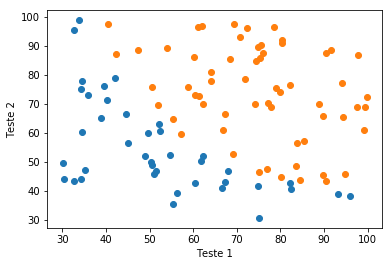

In [157]:
import matplotlib.pyplot as plt

plt.plot(aproved_data[:, 0], aproved_data[:, 1], 'o')
plt.plot(reproved_data[:, 0], reproved_data[:, 1], 'o')
plt.xlabel('Teste 1')
plt.ylabel('Teste 2')
plt.show()

### Adequação ao modelo linear:

O modelo de regressão linear parece adequado pois, ao observar o gráfico, é possível perceber que há uma considerável correlação positiva entre entre X e Y.

### Algoritmo do gradiente descendente estocástico e algumas funções auxiliares:

In [223]:

def get_x(data):
    X = data[:, :-1]
    m = X.shape[0]
    ones = np.ones((m, 1))
    return np.concatenate((ones, X), axis = 1)

def get_y(data):
    y = data[:, -1]
    y = np.array([y])
    return y.T

def sigmoid(z):
    return 1/(1 + np.exp(-(z)))

def vec_sigmoid(X, w):
    return sigmoid(X.dot(w))

def log_cost(data, w):
    X = get_x(data)
    y = get_y(data)
    m = X.shape[0]
    _y = vec_sigmoid(X, w)
    return (np.sum(-y*np.log(_y) - (1.0 - y)*np.log(1.0 -_y)))*(1.0/(2*m))

def to_2d(w):
    return np.reshape(w, (-1,1))

def gradient_descent(data, alpha, n_epochs):
    w = (np.random.rand(data.shape[1], 1)*2)-1
    print "initial w:\n",w
    costs = []
    for i in range(n_epochs):
        np.random.shuffle(data)
        for i in range(len(data)):
            X = get_x(data)
            Y = get_y(data)
            error = (vec_sigmoid(X, w)[i] - Y[i])
            w = w - to_2d(alpha*error*X[i])
        costs.append(log_cost(data, w))
    return (w,costs)

# (w, costs) = gradient_descent(data, alpha=0.001, n_epochs=1000)
# sigmoid(get_x(test), np.array([[0],[0],[0]]))
wm = np.array([[-20],[0.2],[0.1505]])
# print get_x(test)
X = get_x(test)
# y = get_y(test)
# print np.round(vec_sigmoid(X,w))
# print (np.round(vec_sigmoid(X,w)) - np.array(test[:,-1]).reshape(30,1))**2

(w, costs) = gradient_descent(test, 0.0001, 100000)

print costs[0]
print costs[-1]
print w






initial w:
[[ 0.83657552]
 [-0.43827958]
 [ 0.74275328]]


/home/davi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
/home/davi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in multiply


nan
0.124493083052
[[-7.04200319]
 [ 0.05255991]
 [ 0.07088776]]


### Valores finais dos pesos:

In [224]:
print w

[[-7.04200319]
 [ 0.05255991]
 [ 0.07088776]]


### Gráfico “Epoca x EQM”:

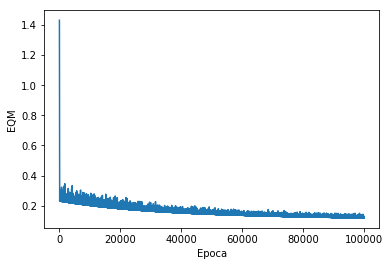

In [225]:
plt.plot(list(range(len(costs))), costs)
plt.xlabel('Epoca')
plt.ylabel('EQM')
plt.show()

O gráfico possui uma tendência decrescente e mostra que o erro quadrático médio estava acima de 8 na primeira época e que seu valor final ficou próximo de 4.5. Portanto, podemos concluir que, apesar de vários picos de piora decorrentes da natureza estocástica do algoritmo, houve sim aprendizado.

## 2) Regressão Linear Múltipla

- Carregue os dados contidos no arquivo _ex1data2.txt_. O arquivo contem 47 linhas e 3 colunas de dados. Cada coluna se refere a uma variável. Neste problema, deve-se desenvolver um modelo onde a variável da coluna 3 será estimada a partir das variáveis das coluna 1 e 2. Os dados apresentados referem-se a um problema de estimação do preço de casas. As variáveis 1 e 2 são a área da casa e o número de quartos, respectivamente. A variável 3 é o preço do imóvel.
- Implemente o algoritmo do gradiente descendente estocástico para encontrar os coeficientes da regressão. Para este algoritmo utilize **α = 0.01** e utilize **100 épocas**  de treinamento. Para cada época de treinamento, calcule o erro quadrático médio (EQM) . Plote o gráfico “épocas x EQM”.

    - **Apresentar:** Valor final dos coeficientes e gráfico épocas x EQM.
    - **Comentários**: Através do gráfico “épocas x EQM” é possível verificar que o algoritmo está “aprendendo” ? Comente.
    


- Encontre os coeficientes da regressão utilizando o método dos mínimos quadrados.

    - **Apresentar**: Valor final dos coeficientes.
    - **Comentários**: Os valores obtidos pelos dois métodos são iguais? Comente.

### Carregando os dados do arquivo:

In [6]:
data = load_data('ex1data2.txt', ' ')

### Rodando o gradiente descendente estocástico:

In [7]:
(w, costs) = gradient_descent(data, alpha=0.01, n_epochs=100)

### Valores finais dos pesos:

In [8]:
print w

[[ 0.884733  ]
 [ 1.37623223]
 [-0.07758161]]


### Gráfico “Epoca x EQM”:

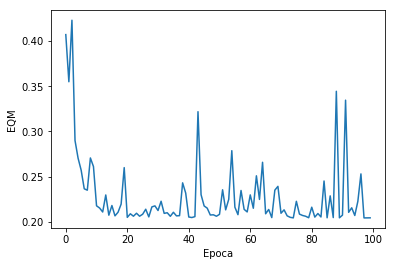

In [9]:
plt.plot(list(range(len(costs))), costs)
plt.xlabel('Epoca')
plt.ylabel('EQM')
plt.show()

O gráfico possui uma tendência decrescente e mostra que o erro quadrático médio estava acima de 0.45 na primeira época e que seu valor final ficou próximo de 0.20. Portanto, podemos concluir que, apesar de vários picos de piora decorrentes da natureza estocástica do algoritmo, houve sim aprendizado.

### Econtrando os coeficientes de regressão utilizando os mínimos quadrados:

In [10]:
def min_squares(data):
    X = get_x(data)
    y = get_y(data)
    return np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y)) 

w_min_sqr = min_squares(data)

print w_min_sqr

[[ 0.8959791 ]
 [ 1.39210674]
 [-0.08738019]]


### Comparação entre os resultados do gradiente descendente e dos mínimos quadrados:

Os valores não são exatamente iguais, mas ficaram muito próximos. O valor obtido por meio do método dos mínimos quadrados é possivelmente mais preciso, pois a sua solução é analítica, muito embora erros númericos possam existir devido ao processo de inversão de matrizes. Outro fator que pode explicar essa diferença é o valor relativamente alto do alpha e um número relativamente baixo de épocas, ambos utilizados no gradiente descendente estocástico. 

## 3) Regularização

- Carregue os dados contidos no arquivo _ex1data3.txt_. O arquivo contem 47 linhas e 6 colunas de dados. Cada coluna se refere a uma variável. Neste problema, deve-se desenvolver um modelo onde a variável da coluna 6 será estimada a partir das demais variáveis. Os dados apresentados referem-se a um problema de estimação do preço de casas. As variáveis 1, 2, 3, 4 e 5 são características dos imóveis e serão utilizadas como entrada do problema de regressão. A variável 6 é o preço do imóvel.
- Divida o conjunto de dados entre treino e teste. Para este problema, os primeiros 30 dados serão utilizados para treino e o restante será usado para teste.
- Encontre os coeficientes da regressão utilizando o método dos mínimos quadrados regularizado para os seguintes valores de λ = [0 1 2 3 4 5]. Utilize o conjunto de treinamento.

    - **Apresentar:** Valores finais dos coeficientes
    - **Comentários**: Quais variáveis parecem ser menos relevantes para a regressão?
    
    
- Encontrar o valor do EQM para os dados de treinamento e de teste para cada um dos valores de λ.

    - **Apresentar**: Dois gráficos. EQM x λ no conjunto de treinamento e EQM x λ no conjunto de teste
    - **Comentários**: Como os valores dos coeficientes variam com λ? Explique o motivo. Comente o crescimento/decrescimento dos erros presente nas figuras EQM x λ.

### Apresentando os valores dos pesos finais para cada coeficiente:

In [11]:
def min_squares_regularized(data, reg_coef):
    X = get_x(data)
    y = get_y(data)
    gram = X.T.dot(X)
    identity = np.identity(len(gram))
    identity[0,0] = 0
    temp = gram + identity*reg_coef
    return np.linalg.inv(temp).dot(X.T.dot(y)) 

data = load_data('ex1data3.txt', ' ')

training = data[:30, :]
test = data[30:, :]

reg_coeficients = [0, 1, 2, 3, 4, 5]

for coef in reg_coeficients:
    print("Valores dos pesos para o coeficiente {}:".format(coef))
    print(min_squares_regularized(training, coef))

Valores dos pesos para o coeficiente 0:
[[ 0.79298919]
 [ 2.05650083]
 [ 0.12143939]
 [-1.16137913]
 [ 0.06272863]
 [-0.39110215]]
Valores dos pesos para o coeficiente 1:
[[ 0.21837683]
 [ 1.3391608 ]
 [ 0.22506765]
 [ 0.18015951]
 [ 0.04805731]
 [-0.24707489]]
Valores dos pesos para o coeficiente 2:
[[ 0.25816829]
 [ 1.16265734]
 [ 0.23054745]
 [ 0.24910813]
 [ 0.05703977]
 [-0.11526088]]
Valores dos pesos para o coeficiente 3:
[[ 0.31875043]
 [ 1.04932735]
 [ 0.23303931]
 [ 0.25988061]
 [ 0.06804293]
 [-0.03117398]]
Valores dos pesos para o coeficiente 4:
[[ 0.38166515]
 [ 0.96594175]
 [ 0.23441173]
 [ 0.25770665]
 [ 0.07853842]
 [ 0.0254692 ]]
Valores dos pesos para o coeficiente 5:
[[ 0.4438308 ]
 [ 0.90053465]
 [ 0.23490892]
 [ 0.25167386]
 [ 0.08786604]
 [ 0.06533369]]


### Relevância das variáveis para a regressão:

Analisando os pesos finais para a regressão com o coeficiente de regularização 5, é possível notar que as variáveis menos relevantes são as de número 5 e 4, pois os valores de ambas ficaram uma casa decimal abaixo dos valores das demais.

### Variação dos coeficientes com o  λ:
Foi percebido que o valor dos pesos diminuia conforme o valor do coeficiente de regularização aumentava. Isso aconteceu porque o coeficiente de regularização serve como uma penalização para cada um dos pesos. Dessa forma, os pesos que mais contribuirem para a diminuição do erro serão menos penalizados e os pesos que menos contribuirem serão mais penalizados.

In [12]:
mqe_training = []
mqe_test = []

for coef in reg_coeficients:
    w = min_squares_regularized(training, coef)
    mqe_training.append(mqe(training, w))
    mqe_test.append(mqe(test, w))

### Gráficos  EQM x λ para os conjuntos de treino e de teste:

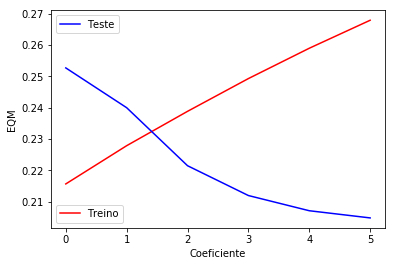

In [13]:
import matplotlib.patches as mpatches

training_plt, = plt.plot(reg_coeficients, mqe_training, color = 'r', label="Treino")
test_plt, = plt.plot(reg_coeficients, mqe_test, color = 'b', label="Teste")
first_legend = plt.legend(handles=[training_plt], loc=3)
ax = plt.gca().add_artist(first_legend)
plt.legend(handles=[test_plt], loc=2)
plt.xlabel('Coeficiente')
plt.ylabel('EQM')
plt.show()

### Crescimento/decrescimento dos erros presentes na figura EQM x λ:

No gráfico acima vemos que o erro no conjunto de teste diminui e que o erro no conjunto de treinamento aumenta conforme o coeficiente de regularização aumenta. Isso acontece porque o modelo inicial com λ=0 sofreu overfitting em relação aos dados de treinamento. Porém, conforme o λ aumentado, esse overfitting diminui e o modelo passa a ter uma capacidade de generalização melhor, fazendo com que o erro no conjunto de teste diminua enquanto o erro no conjunto de treino aumenta.